In [1]:
# Decision Tree, Random Forest, Bagging and Boosting

In [2]:
# import common libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# Load and prepare dataset
titan = pd.read_csv("titanic.csv")
titan = titan.dropna()

titan = titan.drop(["Name"], axis = 1)

# preparing the dependent and independent variables
# Dummy coding using pd.get_dummies() and checking dtypes of coded variables

titan = pd.get_dummies(titan, drop_first = True, dtype = int)

# make y (dependent variable) as np.array
y = np.array(titan["Survival_Survived"])

# make x a dataframe subset with independent variables
X = titan[["Age", "Gender_Male", "Class_2nd", "Class_3rd", "Fare"]]

# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Decision tree with gini index
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier using Gini index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model
clf_gini.fit(X_train, y_train)

# Predict the responses for test dataset
y_pred_dt = clf_gini.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_dt)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)

# Print accuracy, and confusion matrix
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

ROC Area Under Curve: 0.7226515930113052


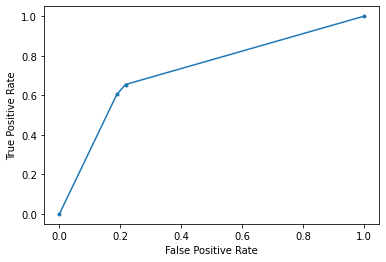

In [7]:
# Decision Tree ROC 
# roc and auc -- decision tree 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

predic_prob =clf_gini.predict_proba(X_test) # Probability estimates [0,1]
rf_auc = roc_auc_score(y_test, predic_prob[:,1])
print("ROC Area Under Curve:", rf_auc)

# visualization of roc 
rf_fpr, rf_tpr, threshold =roc_curve(y_test, predic_prob[:,1])

plt.plot(rf_fpr,rf_tpr,marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [10]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model
clf_rf.fit(X_train, y_train)

# Model predictions
y_pred_rf = clf_rf.predict(X_test)

# Calculate accuracy of Random Forest
accuracy = metrics.accuracy_score(y_test, y_pred_rf)

# Calculate confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)

# Print accuracy, and confusion matrix
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.7802547770700637

Confusion Matrix:
 [[149  26]
 [ 43  96]]


ROC Area Under Curve: 0.8052004110996916


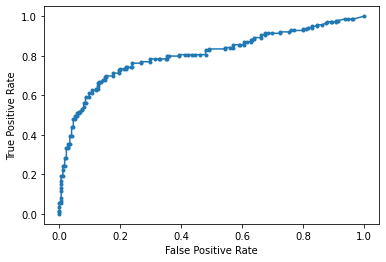

In [9]:
# RF ROC 
# roc and auc -- decision tree 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

predic_prob =clf_rf.predict_proba(X_test) # Probability estimates [0,1]
rf_auc = roc_auc_score(y_test, predic_prob[:,1])
print("ROC Area Under Curve:", rf_auc)

# visualization of roc 
rf_fpr, rf_tpr, threshold =roc_curve(y_test, predic_prob[:,1])

plt.plot(rf_fpr,rf_tpr,marker='.')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()